In [3]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv("sewing.csv")
print("Shape:",data.shape)
data.head()

Shape: (691, 9)


date   quarter  team    smv  over_time  incentive  no_of_workers  \
0  2015-01-01  Quarter1     8  26.16   2.000000   1.661017           59.0   
1  2015-01-01  Quarter1    11  11.41   2.000000   1.639344           30.5   
2  2015-01-01  Quarter1    12  11.41   2.000000   1.639344           30.5   
3  2015-01-01  Quarter1     6  25.90   0.571429   0.892857           56.0   
4  2015-01-01  Quarter1     7  25.90   2.000000   0.678571           56.0   

   actual_productivity  targeted_productivity  
0             0.940725                    0.8  
1             0.800570                    0.8  
2             0.800570                    0.8  
3             0.800382                    0.8  
4             0.800125                    0.8

In [5]:
# wip = 0 for all hence dropped
data["difference"] = data["actual_productivity"] - data["targeted_productivity"]
data["%diff"] = ((data["actual_productivity"] - data["targeted_productivity"])/data["targeted_productivity"])+1
data = data[data["quarter"] != "Quarter5"]
data.date = pd.to_datetime(data.date.apply(lambda x: x.strip())) # Converting date to Date-Time forma
data["week_number"] = data.date.apply(lambda x: (x.week))

In [6]:
team_data = data.groupby("team")

In [7]:
team_data.get_group(3).head()

date   quarter  team    smv  over_time  incentive  no_of_workers  \
5  2015-01-01  Quarter1     3  28.08        2.0   0.782609           57.5   
13 2015-01-03  Quarter1     3  28.08        2.0   0.917431           54.5   
33 2015-01-04  Quarter1     3  19.87        2.0   0.818182           55.0   
46 2015-01-05  Quarter1     3  19.87        2.0   0.818182           55.0   
52 2015-01-06  Quarter1     3  19.87        3.0   0.909091           55.0   

    actual_productivity  targeted_productivity  difference     %diff  \
5              0.753683                   0.75    0.003683  1.004911   
13             0.800323                   0.80    0.000323  1.000404   
33             0.750243                   0.75    0.000243  1.000324   
46             0.750243                   0.75    0.000243  1.000324   
52             0.800274                   0.80    0.000274  1.000342   

    week_number  
5             1  
13            1  
33            1  
46            2  
52            2

# Productivity trends

## General Productivity trend

### Daily


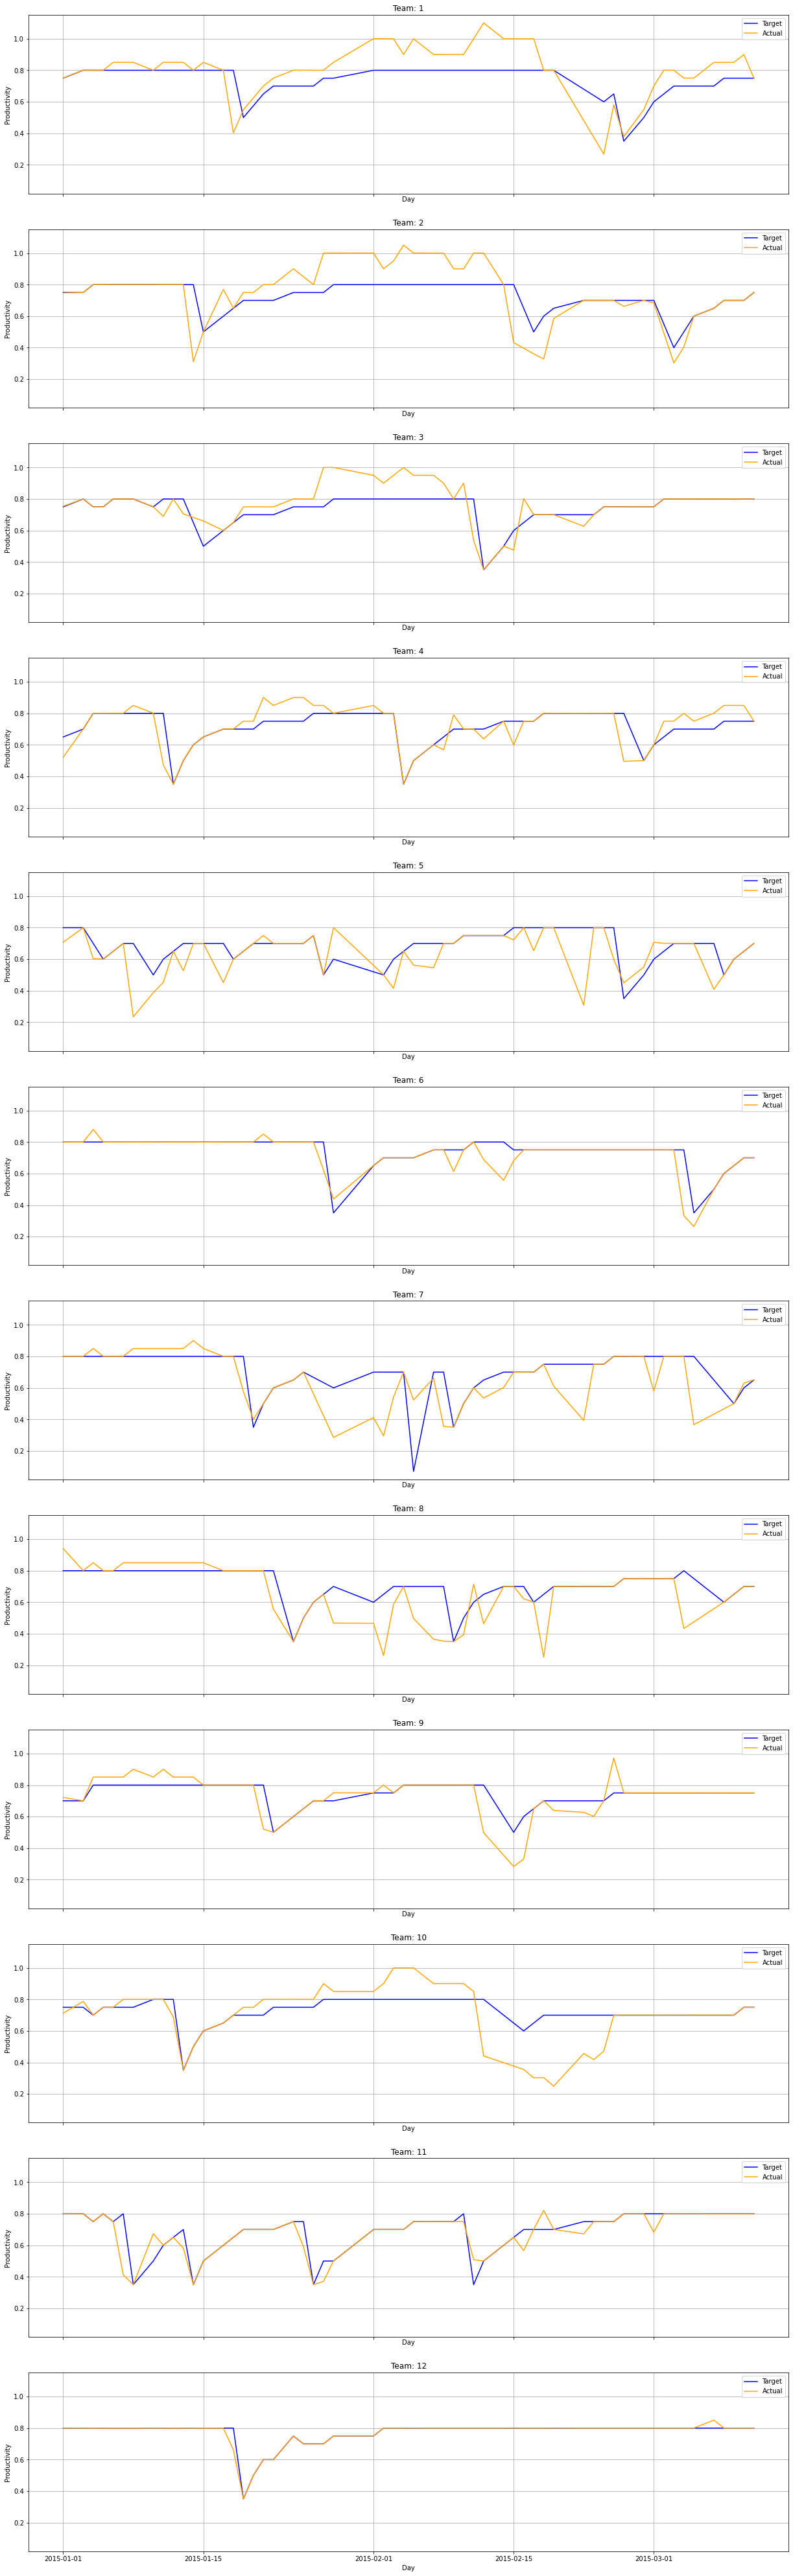

In [8]:
fig, ax = plt.subplots(12,1, sharey=True, sharex=True)
fig.set_size_inches(21, 72,  forward=True)
for team in range(1,13):
    t = team_data.get_group(team)[["date","targeted_productivity","actual_productivity"]]
    t = t.sort_values(by="date")
    
    ax[team-1].plot_date(t["date"],t["targeted_productivity"], "b")
    ax[team-1].plot_date(t["date"],t["actual_productivity"], "orange")
    ax[team-1].legend(["Target","Actual"])
    ax[team-1].grid(True)
    ax[team-1].set_title("Team: "+(str)(team))
    ax[team-1].set_xlabel("Day")
    ax[team-1].set_ylabel("Productivity")
    

### Weekly

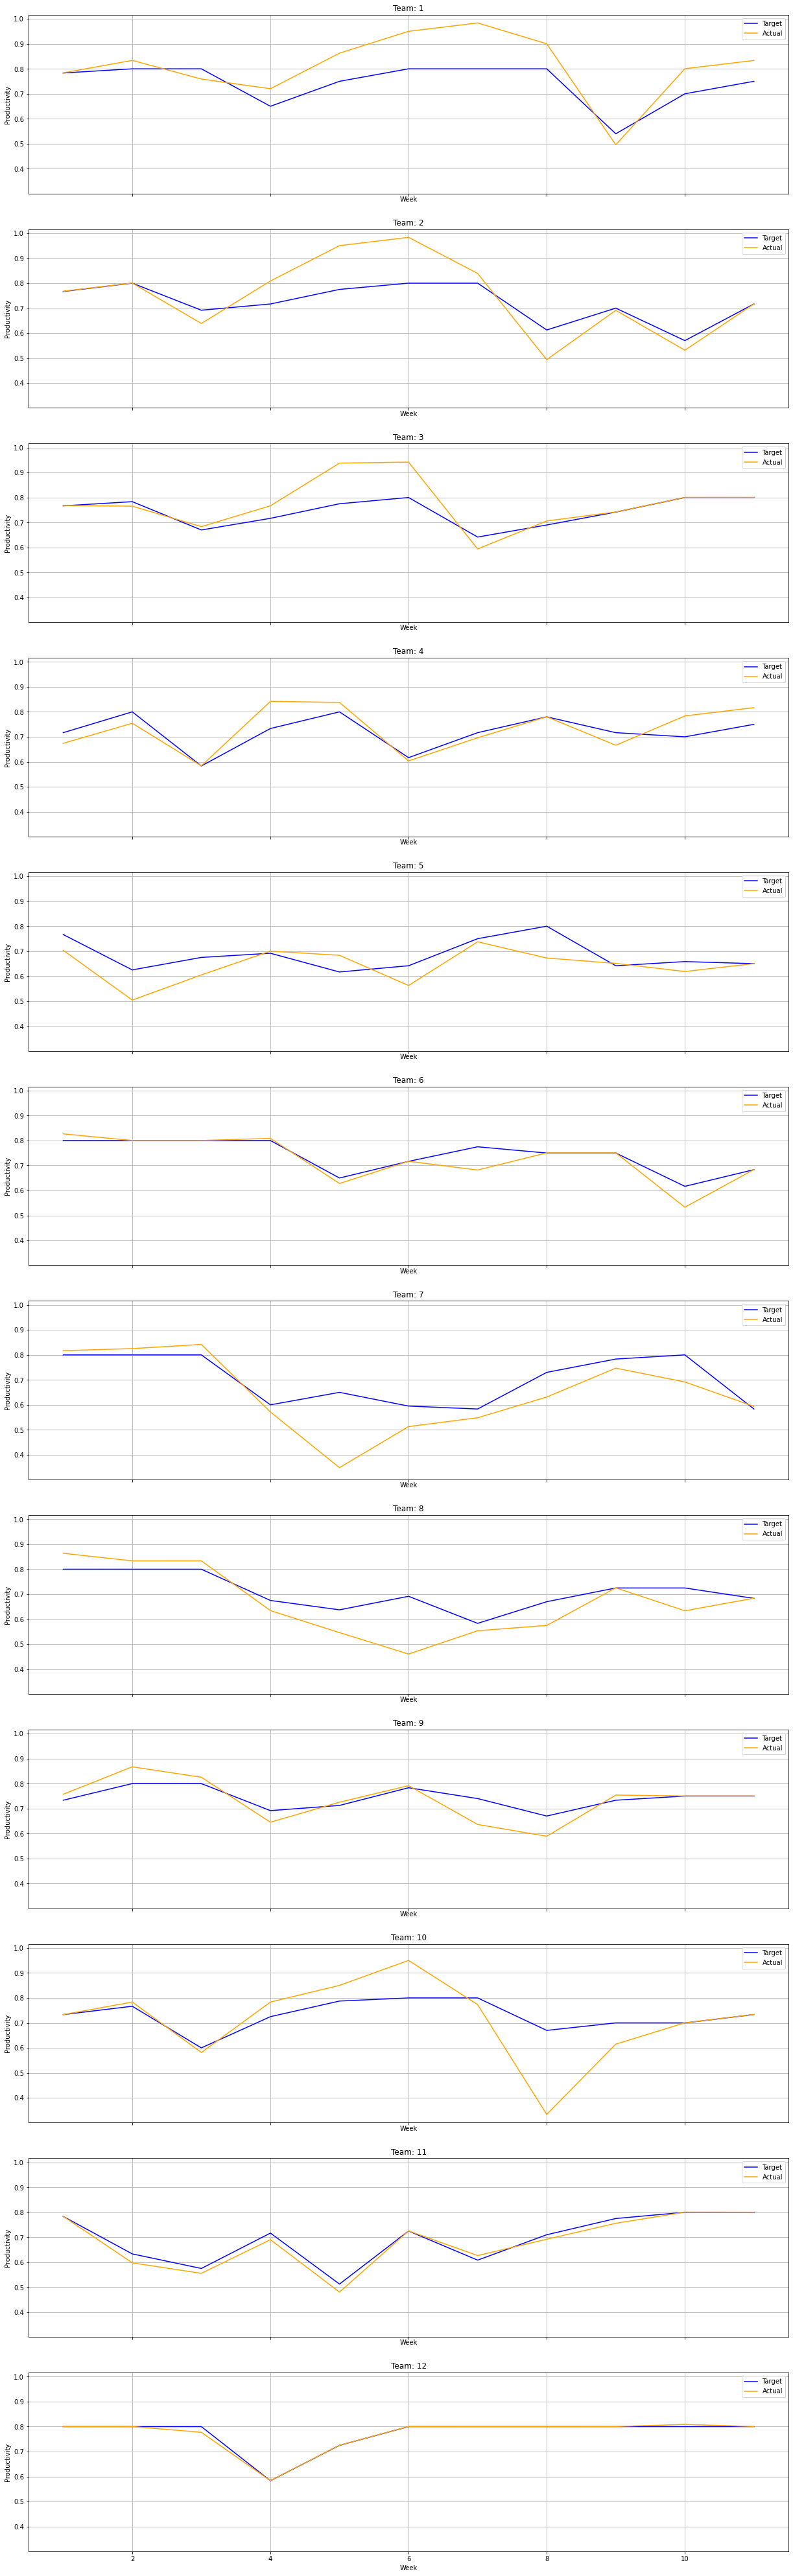

In [9]:
fig, ax = plt.subplots(12,1, sharey=True, sharex=True)
fig.set_size_inches(21, 72,  forward=True)

for team in range(1,13):
    t = team_data.get_group(team)
    t = t.groupby("week_number")[["targeted_productivity","actual_productivity"]].agg("mean")
    
    ax[team-1].plot(t.index,t["targeted_productivity"], "b")
    ax[team-1].plot(t.index,t["actual_productivity"], "orange")
    ax[team-1].legend(["Target","Actual"])
    ax[team-1].grid(True)
    ax[team-1].set_title("Team: "+(str)(team))
    ax[team-1].set_xlabel("Week")
    ax[team-1].set_ylabel("Productivity")
    # print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

## Most Productive Team

In [10]:
df = data[["team","targeted_productivity","actual_productivity"]].copy()
df["diff^2"] = numpy.square(df["actual_productivity"] - df["targeted_productivity"])
df["gmean"] = 1+(df["actual_productivity"] - df["targeted_productivity"])/df["targeted_productivity"] 

In [11]:
from scipy import stats

def geo_mean(series):
    return stats.gmean(series)

In [12]:
df.groupby("team")["gmean"].agg(geo_mean).sort_values(ascending = False)

team
1     1.077298
3     1.031632
2     1.009653
4     1.007854
12    0.998199
11    0.981202
9     0.977685
6     0.969793
10    0.946691
7     0.945013
5     0.921335
8     0.910704
Name: gmean, dtype: float64

Most Productive are: 1,3,2,4,12

In [13]:
df.groupby(["team"])["diff^2"].agg(mean).sort_values()

team
12    0.000378
11    0.005548
6     0.005704
9     0.007200
4     0.007299
3     0.007873
5     0.016119
8     0.017646
1     0.017747
2     0.018910
10    0.019894
7     0.022326
Name: diff^2, dtype: float64

Top 5 most consistent teams are: 1,12,3,2,9?


## Productivity across Quarters

In [14]:
df = data.groupby(["quarter"])["targeted_productivity","actual_productivity"].agg("mean")
df

<ipython-input-14-abc288502adc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(["quarter"])["targeted_productivity","actual_productivity"].agg("mean")


targeted_productivity  actual_productivity
quarter                                             
Quarter1               0.741801             0.746671
Quarter2               0.727128             0.727200
Quarter3               0.708527             0.685272
Quarter4               0.708929             0.705725

Correlation: 0.9506018046596604


Text(0, 0.5, 'productivity')

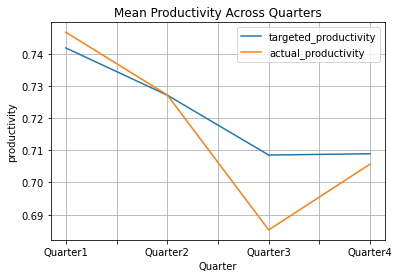

In [15]:
print("Correlation:",df["actual_productivity"].corr(df["targeted_productivity"]))
df.plot(title = "Mean Productivity Across Quarters", grid = True)
xlabel("Quarter")
ylabel("productivity")

# Productivity across Quarters by team

In [16]:
df_productivity = data.groupby(["team","quarter"])["targeted_productivity","actual_productivity"].agg("mean")
df_productivity.head()

<ipython-input-16-11b89a3c4b84>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_productivity = data.groupby(["team","quarter"])["targeted_productivity","actual_productivity"].agg("mean")


targeted_productivity  actual_productivity
team quarter                                             
1    Quarter1               0.755556             0.850369
     Quarter2               0.787500             0.884673
     Quarter3               0.755000             0.790530
     Quarter4               0.640000             0.658095
2    Quarter1               0.726471             0.779247

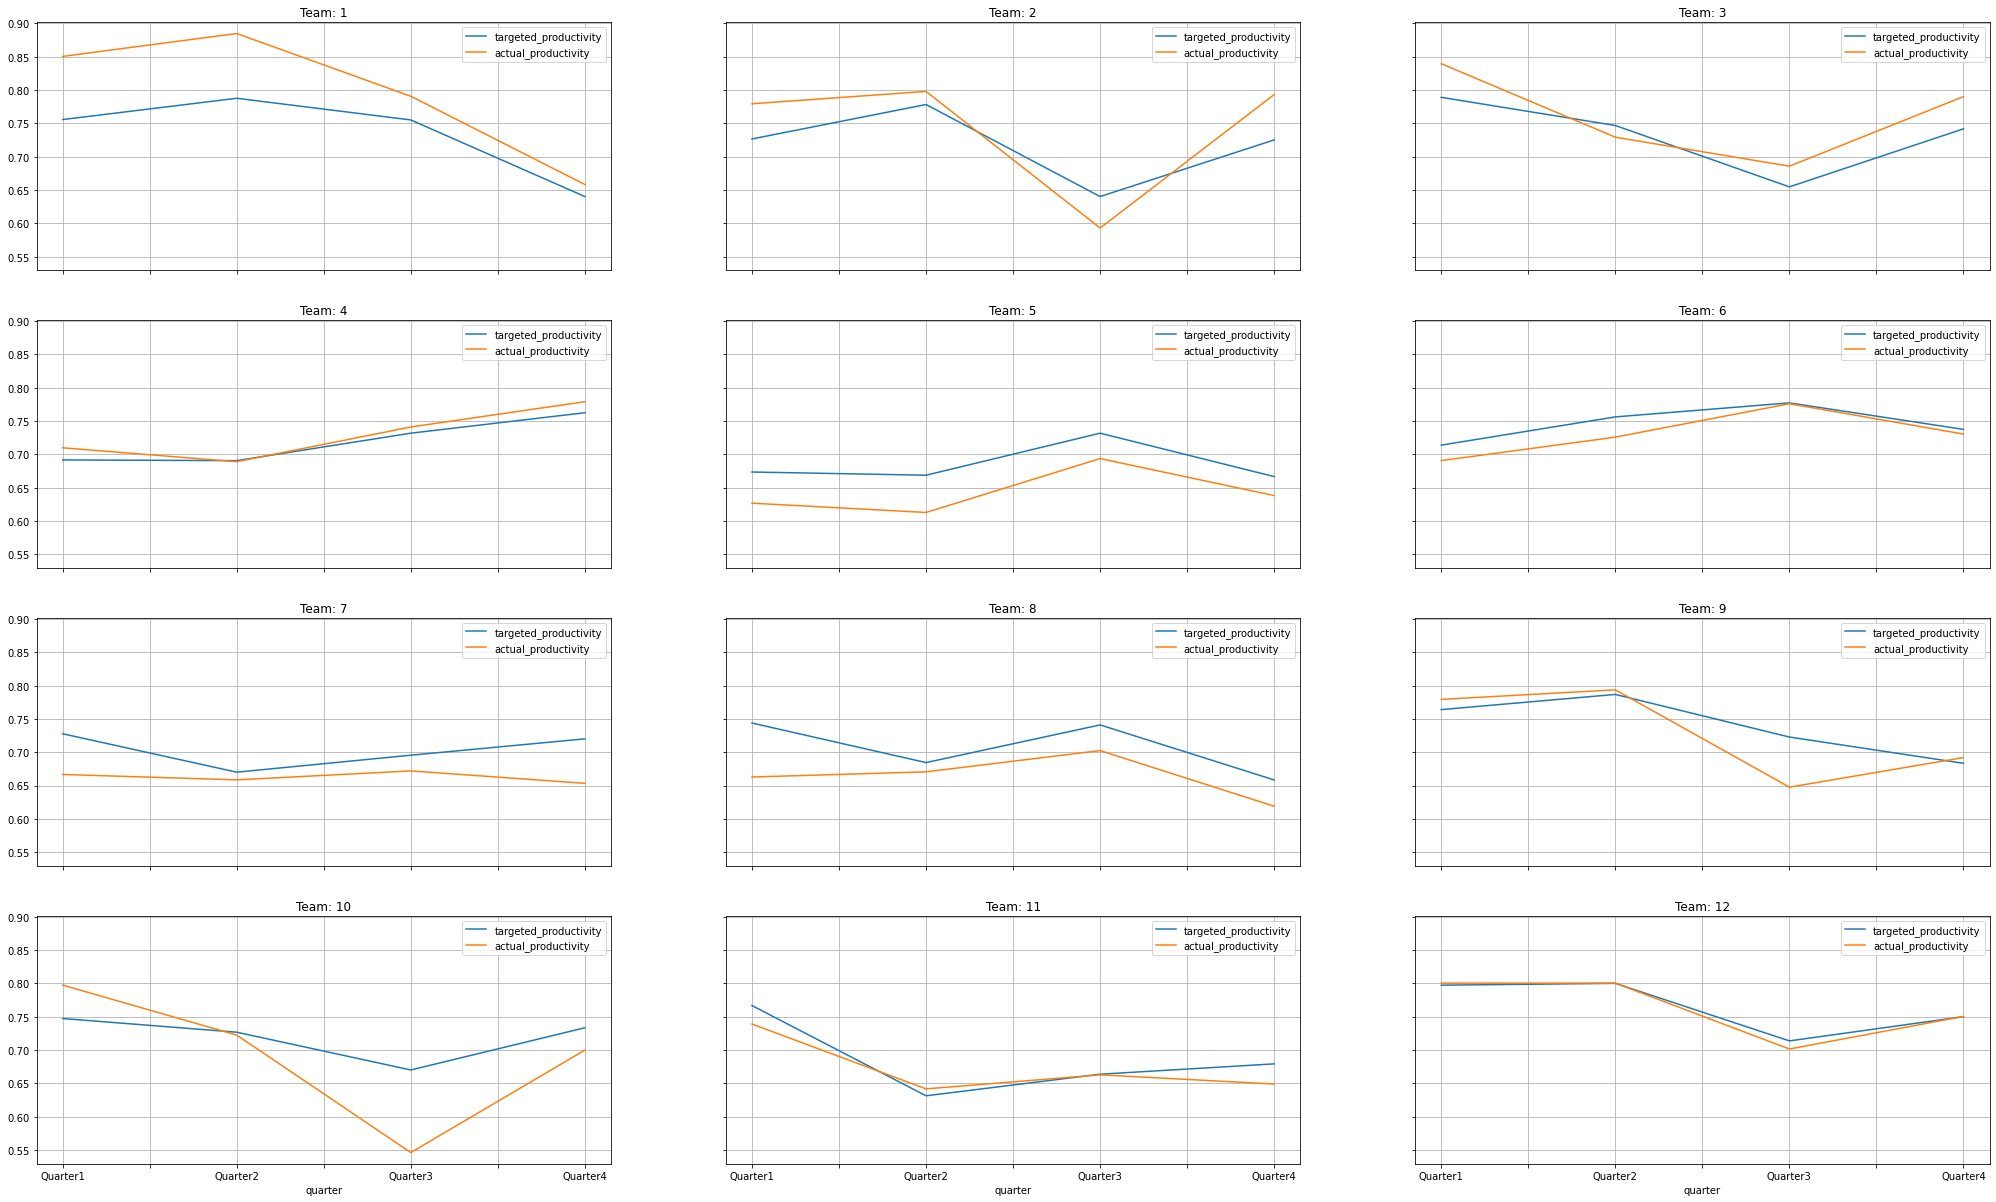

In [17]:
fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,13):
    t = df_productivity.loc[team,:]
    t.plot(ax=ax[((team-1)//3),((team-1)%3)],title='Team: '+(str)(team), grid=True)
    # print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

In [18]:
for ax in fig.axes:
    print(ax.yaxis.axes.get_ylim())

(0.5291982676075, 0.9016003920425001)
(0.5291982676075, 0.9016003920425001)
(0.5291982676075, 0.9016003920425001)
(0.5291982676075, 0.9016003920425001)
(0.5291982676075, 0.9016003920425001)
(0.5291982676075, 0.9016003920425001)
(0.5291982676075, 0.9016003920425001)
(0.5291982676075, 0.9016003920425001)
(0.5291982676075, 0.9016003920425001)
(0.5291982676075, 0.9016003920425001)
(0.5291982676075, 0.9016003920425001)
(0.5291982676075, 0.9016003920425001)


In [19]:
def GetPlots(featureName, bin = [0, 5, 8, 13, 15, 18, 20, 23, 25, 30, 80]):
    
    df = data.groupby(["team","quarter"])[featureName].agg("mean")
    fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
    fig.set_size_inches(35, 21, forward=True)
    for team in range(1,13):
        t = df.loc[team,:]
        t.plot(ax=ax[((team-1)//3),((team-1)%3)],
                title='Team: '+(str)(team),
                xlabel = "Quarters",
                ylabel = featureName, 
                grid=True, color = "red", legend = [featureName])
        ax2 = fig.axes[team-1].twinx()
        # ax2.set_xlim(-0.15000000000000002, 3.15)
        ax2.set_ylim(0.5, 1.0)
        df_productivity.loc[team,:].plot(ax=ax2, alpha = 0.2)

        # print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))
    
    plt.figure()
    df = data.sort_values(by="no_of_workers")
    print(df.shape)

    df['binned'] = pd.cut(df[featureName], bins=bin)
    plot1 = df.groupby("binned")["difference"].agg("mean").plot(xlabel = featureName,ylabel = "Productivity Difference", title = featureName+" v/s Productivity")
    # plt.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

    ax = plt.figure()

    plot2 = df.groupby("binned")["%diff"].agg(geo_mean).plot(xlabel = featureName,ylabel = "Productivity Difference(Geometric)", title = featureName+" v/s Productivity")
    # plt.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

    
    plot3 = df.groupby("binned")[["targeted_productivity",
                        "actual_productivity"]].agg("mean").plot(xlabel = featureName,
                                                                ylabel = "Productivity", 
                                                                title = featureName+" v/s Productivity")
    # plt.vlines(1+2/5,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")
    return plot1, plot2, plot3, fig

# Team Size v/s Productivity

<AxesSubplot:ylabel='Frequency'>

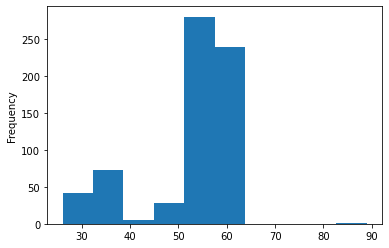

In [27]:
data["no_of_workers"].plot.hist()

(668, 12)


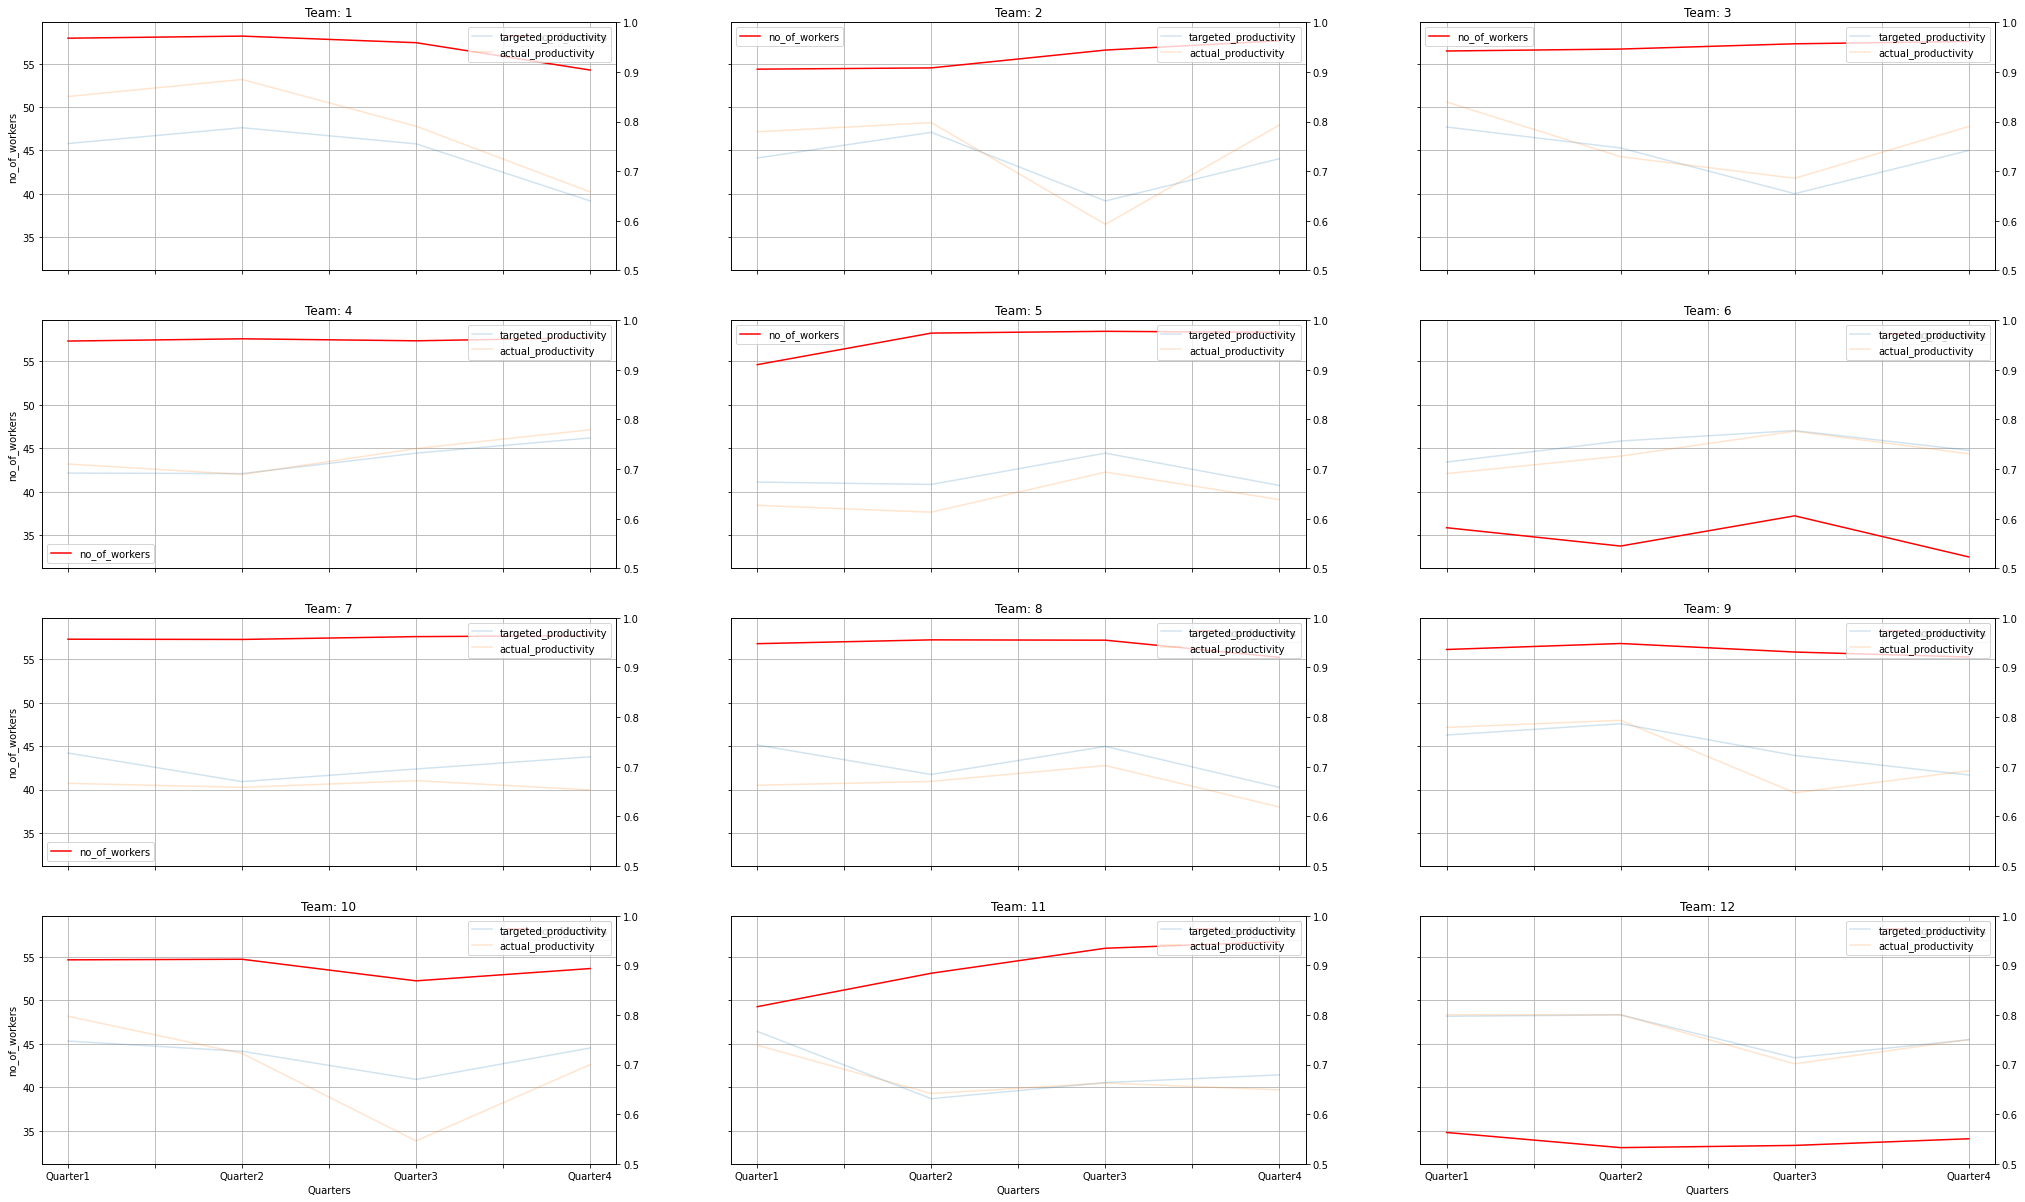

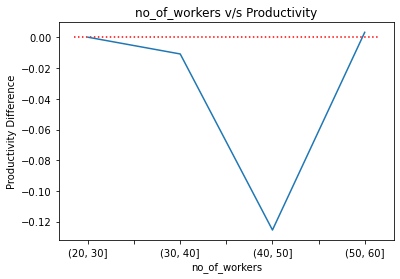

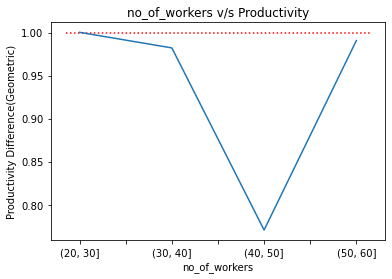

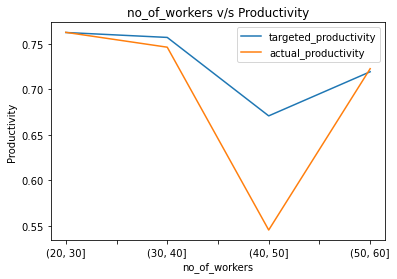

In [30]:
meanPlot, gmeanPlot, actualvtargetproductivity, teamPlot = GetPlots("no_of_workers",[0, 10, 20, 30, 40, 50, 60, 70, 80])
meanPlot.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
gmeanPlot.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
# actualvtargetproductivity.vlines(2,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

# OverTime

<AxesSubplot:ylabel='Frequency'>

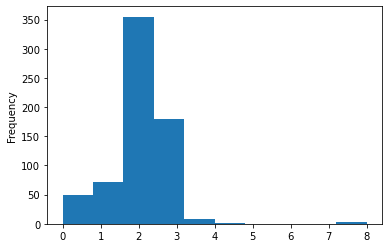

In [31]:
data["over_time"].plot.hist()

(668, 12)


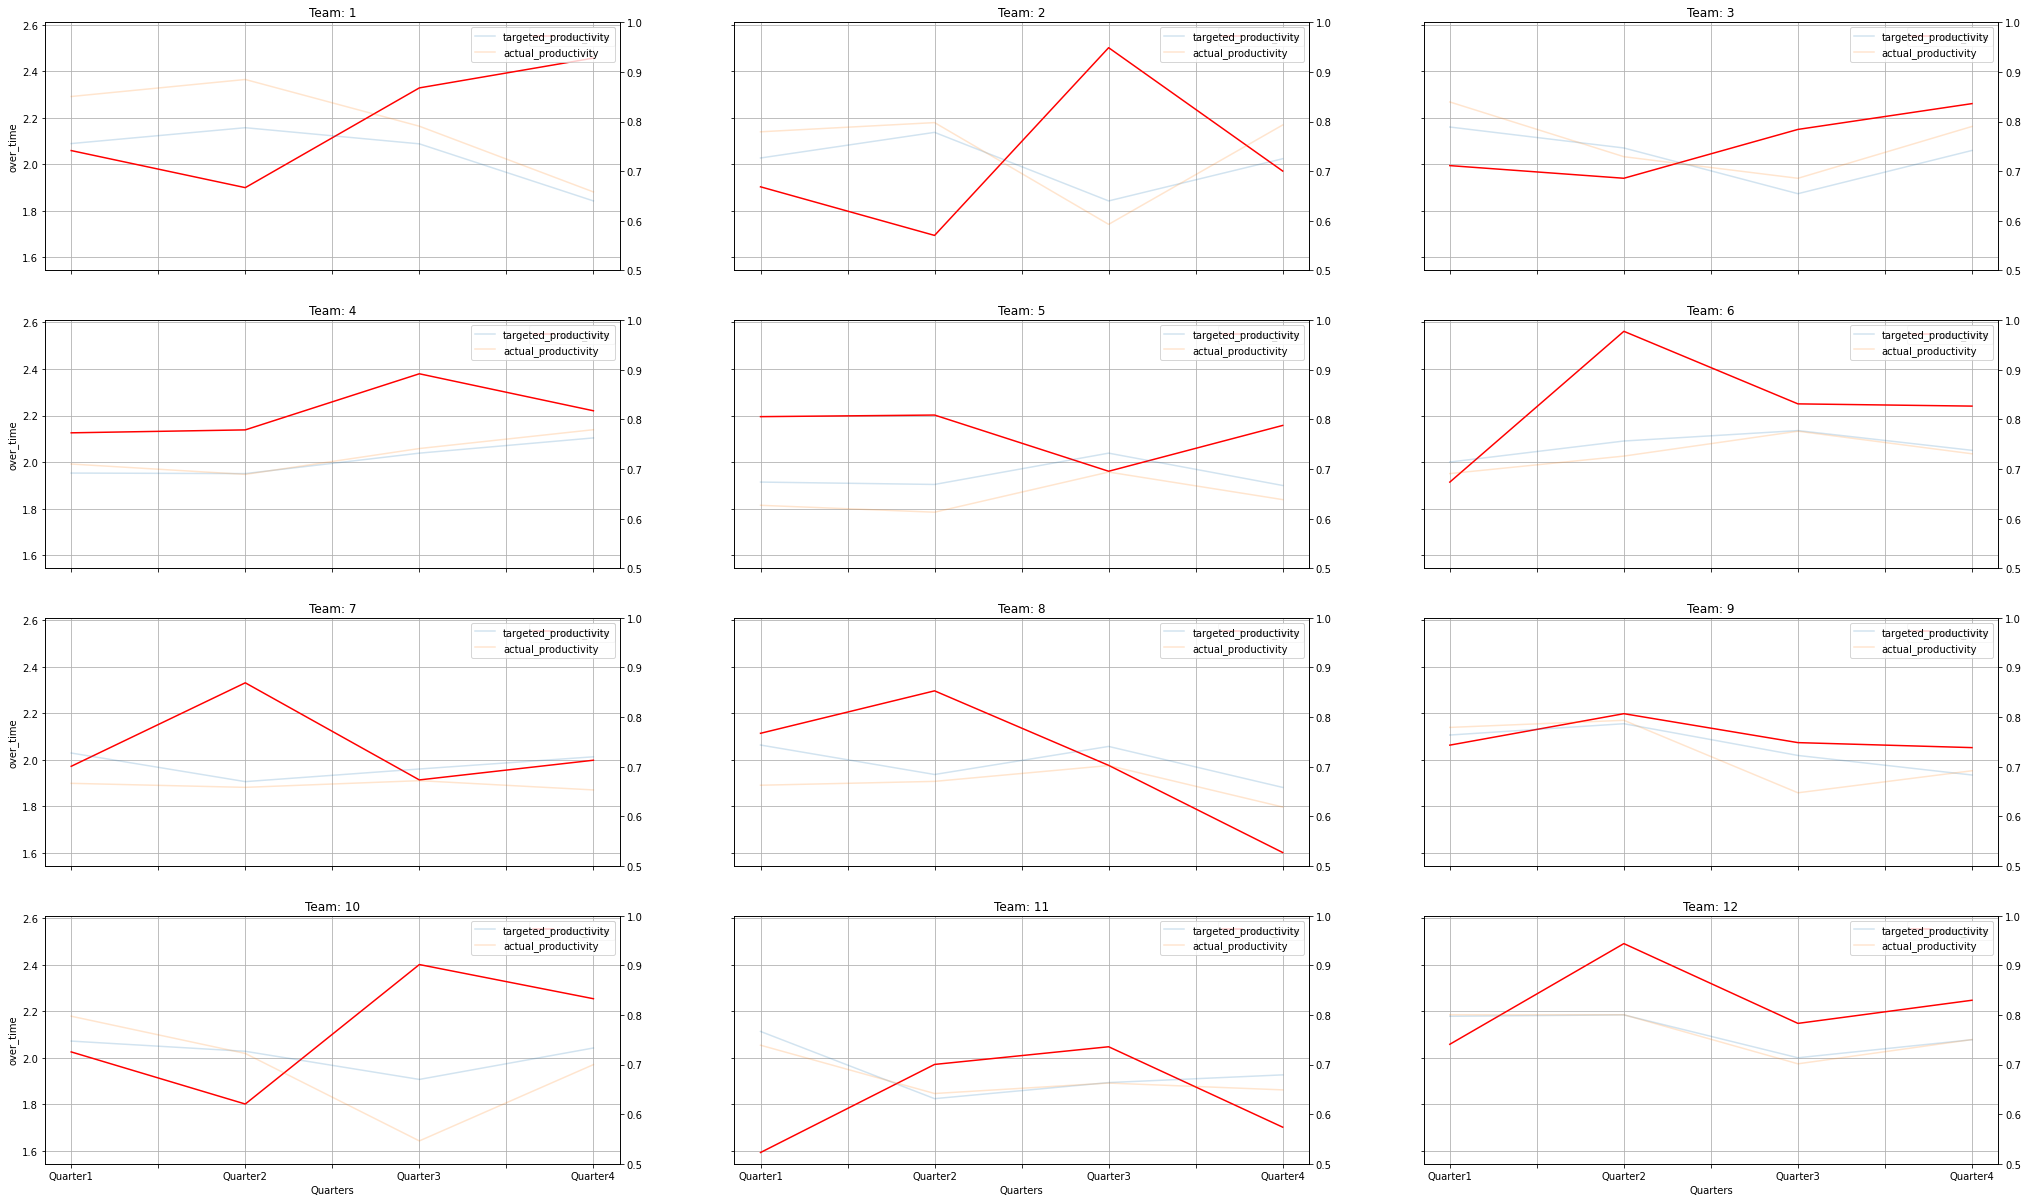

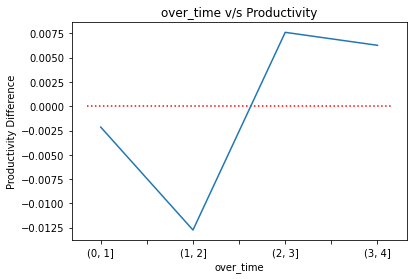

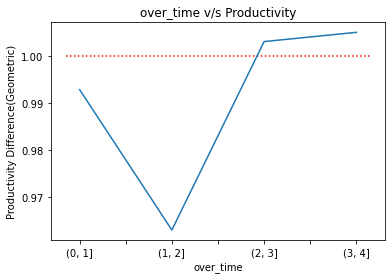

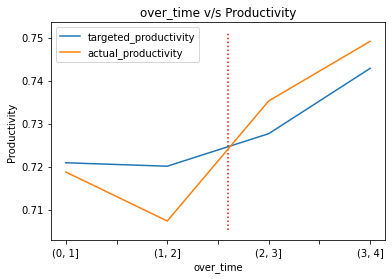

In [36]:
meanPlot, gmeanPlot, actualvtargetproductivity, teamPlot = GetPlots("over_time",[0, 1, 2, 3, 4, 5, 6, 7])
meanPlot.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
gmeanPlot.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
actualvtargetproductivity.vlines(1+3/5,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

# SMV

<AxesSubplot:ylabel='Frequency'>

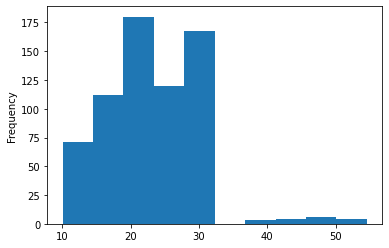

In [37]:
data["smv"].plot.hist()

(668, 12)


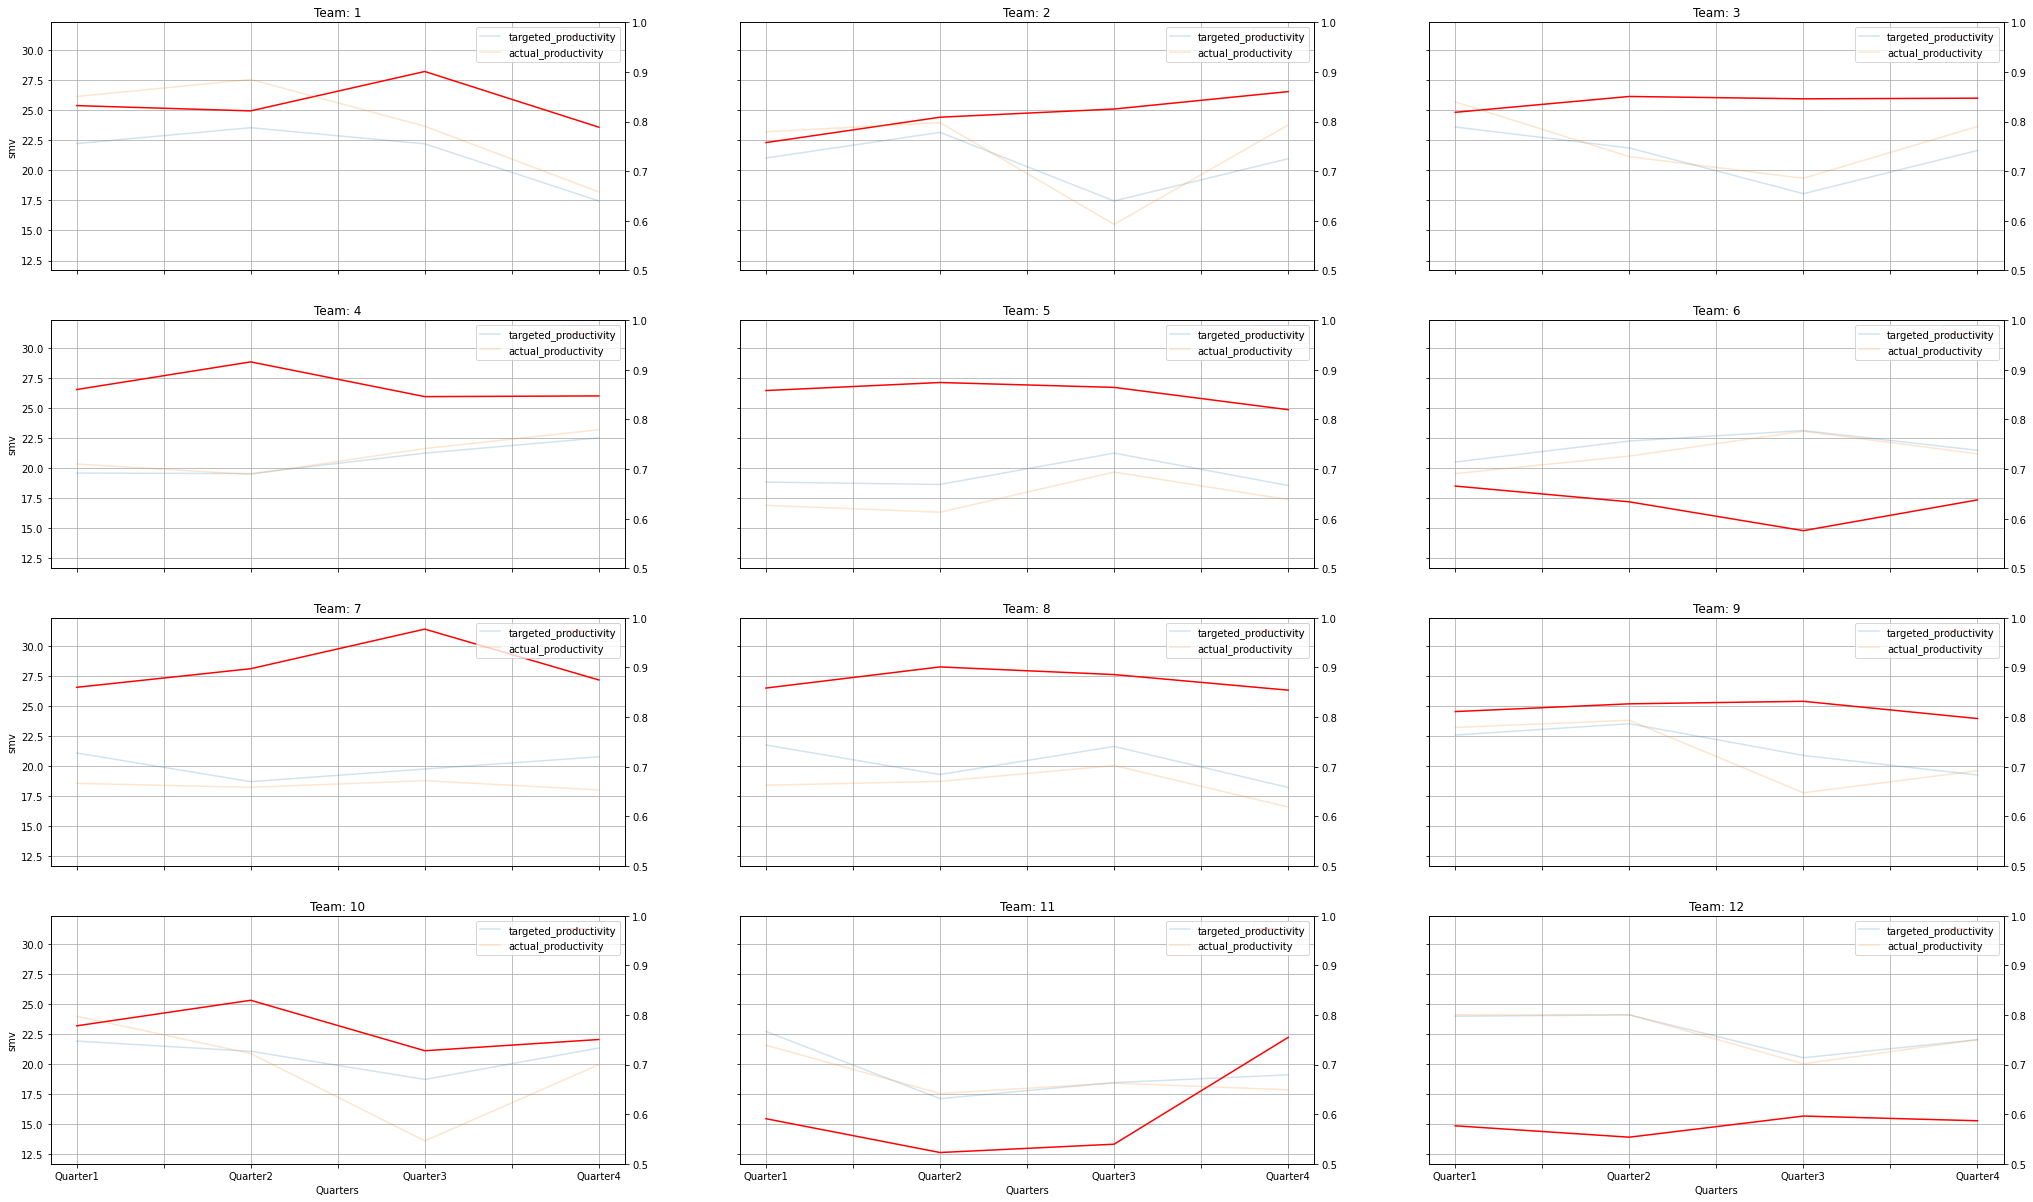

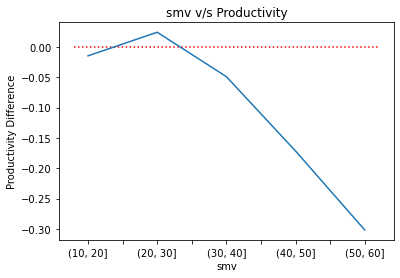

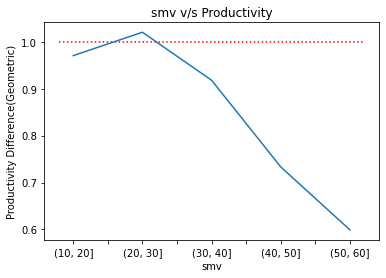

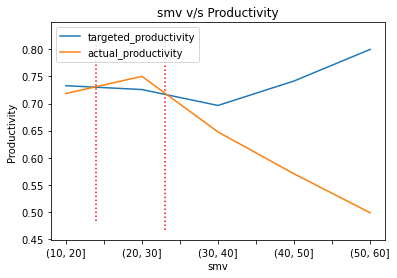

In [41]:
meanPlot, gmeanPlot, actualvtargetproductivity, teamPlot= GetPlots("smv",[10,20,30,40,50,60])
meanPlot.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
gmeanPlot.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
actualvtargetproductivity.vlines(0.4,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")
actualvtargetproductivity.vlines(1.3,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

# Incentive

<AxesSubplot:ylabel='Frequency'>

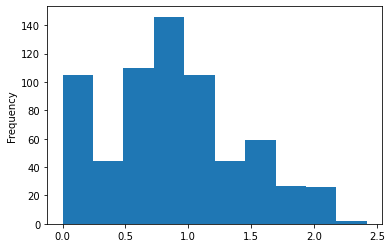

In [43]:
data["incentive"].plot.hist()

(668, 12)


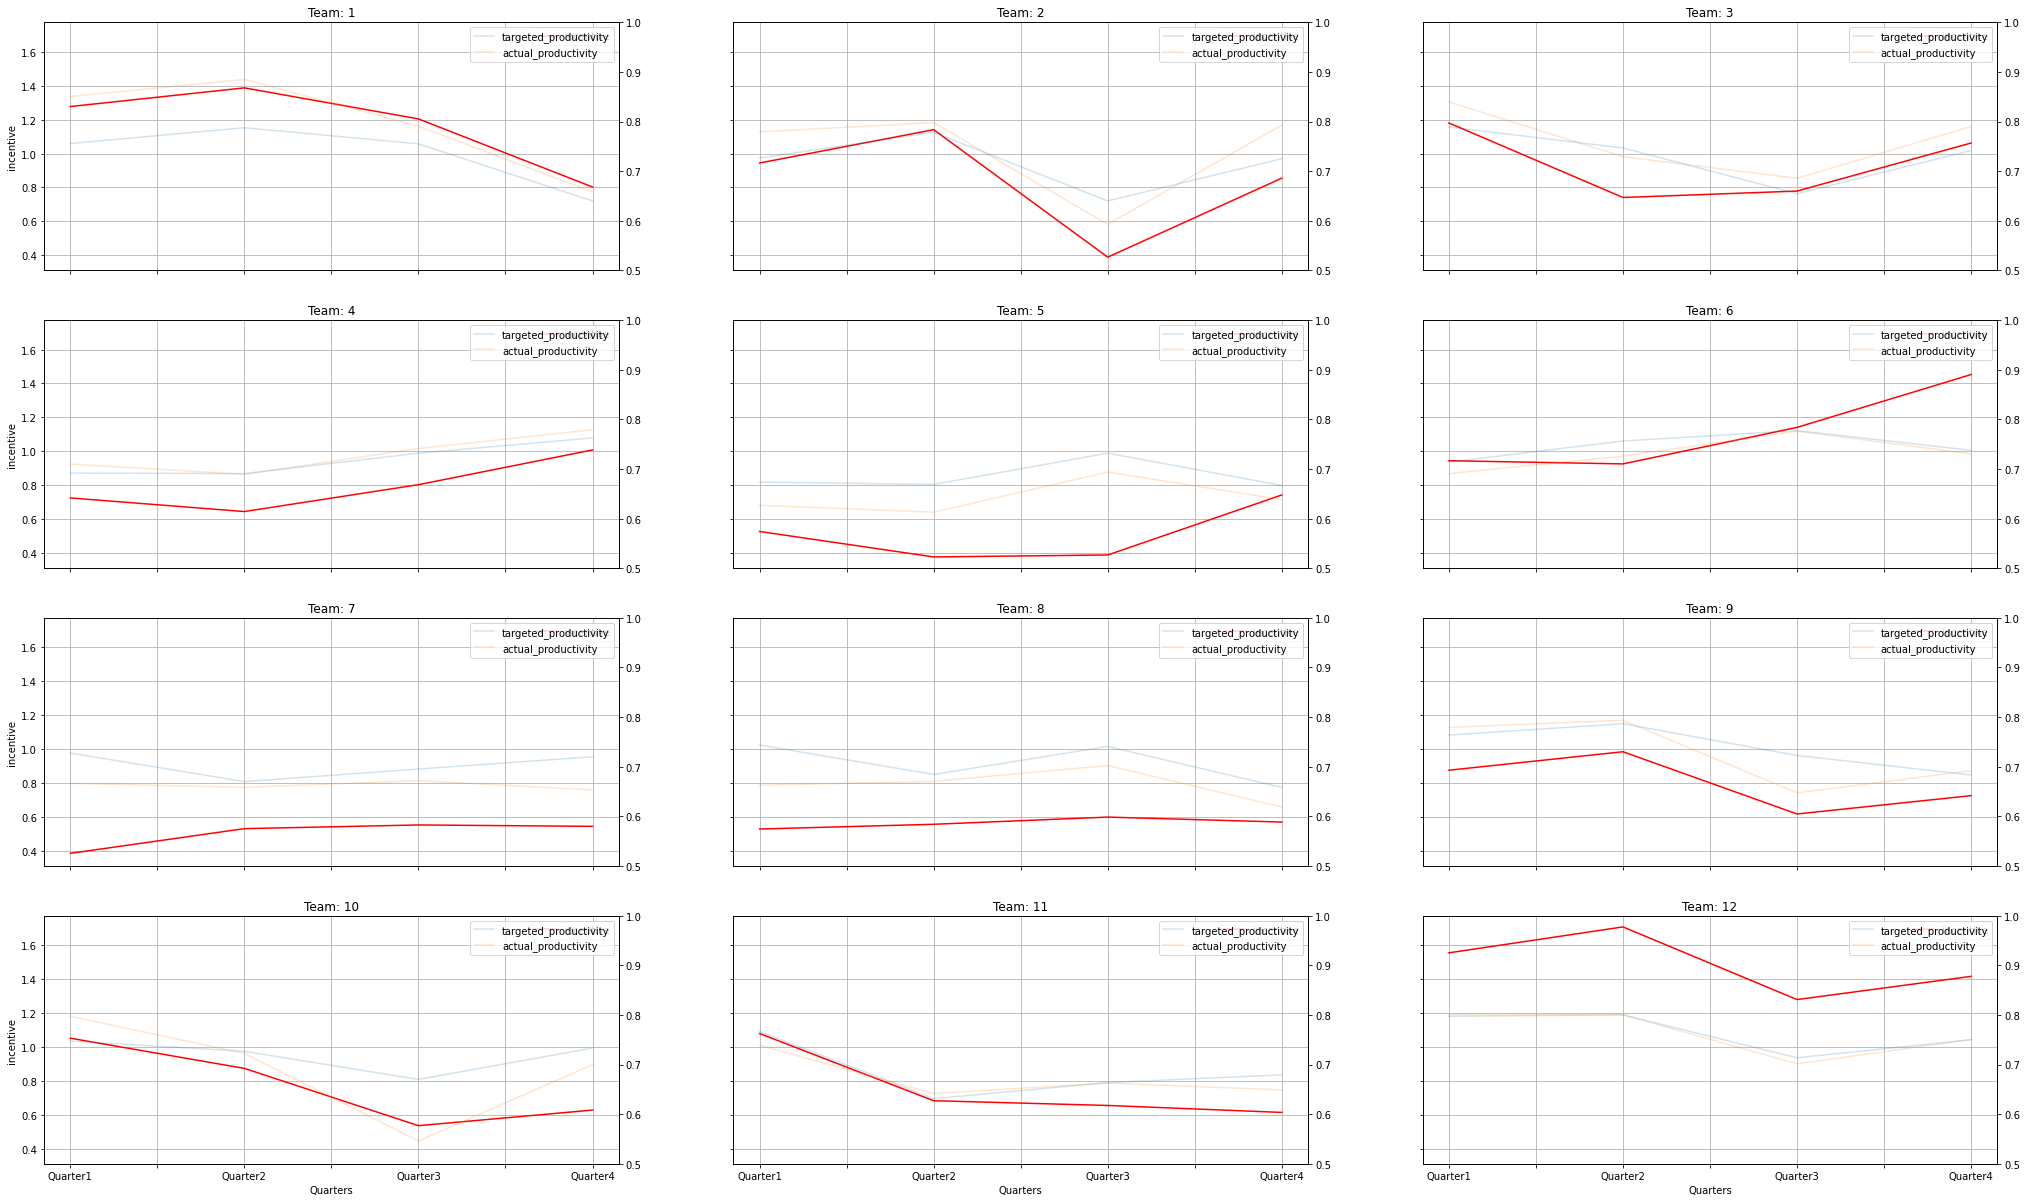

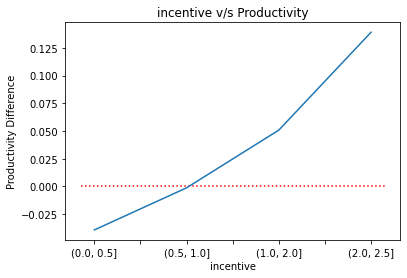

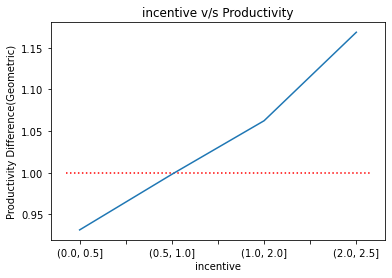

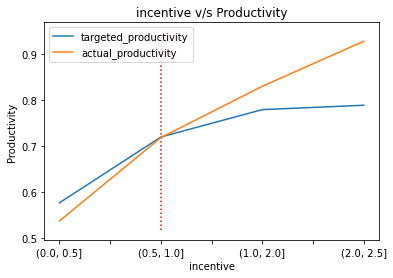

In [45]:
meanPlot, gmeanPlot, actualvtargetproductivity, teamPlot= GetPlots("incentive",[0, 0.5,1.0,2.0,2.5,3.0])
meanPlot.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
gmeanPlot.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
actualvtargetproductivity.vlines(1,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

In [ ]:
# exit(0)

***

End of **EDA**

***
***
***


# Team size v/s Productivity

In [ ]:
df = data.sort_values(by="no_of_workers")
print(df.shape)
df.head()

NameError: name 'data' is not defined

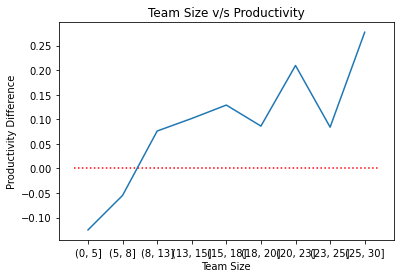

In [ ]:
bins = [0, 5, 8, 13, 15, 18, 20, 23, 25, 30, 80]
# labels = ["Under 10","10-15","15-20","20-25","25-30","30+"]
df['binned'] = pd.cut(df['no_of_workers'], bins=bins)#, labels=labels)
df.groupby("binned")["difference"].agg("mean").plot(xlabel = "Team Size",ylabel = "Productivity Difference", title = "Team Size v/s Productivity")
plt.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

In [ ]:
df.groupby("binned")["%diff"].agg(geo_mean).plot(xlabel = "Team Size",ylabel = "Productivity Difference(Geometric)", title = "Team Size v/s Productivity")
plt.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

Bigger Team Sizes Leads to more productive teams

In [ ]:
df.groupby("binned")[["targeted_productivity",
                        "actual_productivity"]].agg("mean").plot(xlabel = "Team Size",
                                                                ylabel = "Productivity", 
                                                                title = "Team Size v/s Productivity")
plt.vlines(1+2/5,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

NameError: name 'df' is not defined

# Overtime vs Productivity

In [ ]:
df["over_time"].value_counts().sort_index()

In [ ]:
df = data.sort_values(by="no_of_workers")
print(df.shape)
df.head()

In [ ]:
bins = [0, 1, 3, 5, 7, 9, 11, 13]
# labels = ["Under 10","10-15","15-20","20-25","25-30","30+"]
df['binned'] = pd.cut(df['over_time'], bins=bins)#, labels=labels)
df.groupby("binned")["difference"].agg("mean").plot(xlabel = "Overtime(Hrs)",ylabel = "Actual Productivity(%age of Target)", title = "Overtime v/s Productivity")
plt.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

In [ ]:
df.groupby("binned")["%diff"].agg(geo_mean).plot(xlabel = "Overtime(hrs)",ylabel = "Actual Productivity(%age of Target)", title = "Overtime v/s Productivity")
plt.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

In [ ]:
df.groupby("binned")[["targeted_productivity",
                        "actual_productivity"]].agg("mean").plot(xlabel = "Team Size",
                                                                ylabel = "Productivity", 
                                                                title = "Team Size v/s Productivity")

In [ ]:
df = data.groupby(["team","quarter"])["no_of_workers",].agg("mean")
df.head()

In [ ]:
fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,13):
    t = df.loc[team,:]
    t.plot(ax=ax[((team-1)//3),((team-1)%3)],title='Team: '+(str)(team), grid=True)
    # print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

# SMV vs Productivity

In [ ]:
df = data.sort_values(by="no_of_workers")
print(df.shape)
df.head()

In [ ]:
df["smv"].value_counts().sort_index()

In [ ]:
bins = [0, 3, 4, 5, 7]
# labels = ["Under 10","10-15","15-20","20-25","25-30","30+"]
df['binned'] = pd.cut(df['smv'], bins=bins)#, labels=labels)
df.groupby("binned")["difference"].agg("mean").plot(xlabel = "Overtime(Hrs)",ylabel = "Actual Productivity(%age of Target)", title = "Overtime v/s Productivity")
plt.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

In [ ]:
df.groupby("binned")["%diff"].agg(geo_mean).plot(xlabel = "Overtime(hrs)",ylabel = "Actual Productivity(%age of Target)", title = "Overtime v/s Productivity")
plt.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

In [ ]:
df.groupby("binned")[["targeted_productivity",
                        "actual_productivity"]].agg("mean").plot(xlabel = "Team Size",
                                                                ylabel = "Productivity", 
                                                                title = "Team Size v/s Productivity")
plt.vlines(1-1/4,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")
plt.vlines(2.5+1/4,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

In [ ]:
df_productivity.head()

In [ ]:
df = data.groupby(["team","quarter"])["over_time",].agg("mean")
df.head()

In [ ]:
fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
# ax2 = fig.axes.twiny()
for team in range(1,13):
    t = df.loc[team,:]
    t.plot(ax=ax[((team-1)//3),((team-1)%3)],title='Team: '+(str)(team), grid=True, color = "red")
    ax2 = fig.axes[team-1].twinx()
    # ax2.set_xlim(-0.15000000000000002, 3.15)
    ax2.set_ylim(0.5, 1.1)
    df_productivity.loc[team,:].plot(ax=ax2, alpha = 0.3)

     
    # print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

# Incentive trends
## Incentive v/s Productive trend


## General Incentive Trend

## Incentive per quarter


## Incentive per quarter per team

In [ ]:
df_incentive = data.groupby(["team","quarter"])["incentive"].agg("mean")
df_incentive.head()

In [ ]:
fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,13):
    t = df_incentive.loc[team,:]
    t.plot(ax=ax[((team-1)//3),((team-1)%3)],title='Team: '+(str)(team), grid=True)

## Overtime vs Incentive